In [4]:
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import timedelta
import numpy as np
from scipy.interpolate import BSpline
import pandas as pd


In [5]:
data = pd.read_csv('timeframes-c4rs.csv', decimal=',', error_bad_lines=False, delimiter=';')

In [6]:
data.describe()

,count,time_frame
count,2.300000e+01,23.00000
mean,1.547520e+06,45.00000
std,4.208585e+05,6.78233
min,1.223509e+06,34.00000
25%,1.249072e+06,39.50000
50%,1.333206e+06,45.00000
75%,1.855053e+06,50.50000
max,2.951000e+06,56.00000


In [7]:
data.head()


,count,max,time_frame
0,1223509,2016-01-01 00:00:31.401646,34
1,1230031,2016-01-04 00:07:42.276393,35
2,1233276,2016-01-10 12:00:02.987686,36
3,1235968,2016-01-17 18:03:22.68442,37
4,1236430,2016-01-24 18:04:37.370966,38


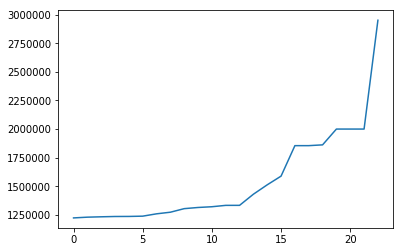

In [8]:
data['count'].plot()

In [55]:
data['max'] = data['max'].apply(lambda x: parse(str(x), fuzzy=True).date())
delta = timedelta(days=150)
timeslots = [data['max'][0]]

lastDay = data['max'].iloc[-1]

while True:
    timeslots.append(timeslots[-1] + delta)
    
    if timeslots[-1] > lastDay:
        break
        
timeslots = np.array(timeslots)
counts = np.full(len(timeslots), 1223509)

In [56]:
for index, slot in np.ndenumerate(timeslots):
    
    past = data[data['max'] < slot]
    
    if not past.empty:
        counts[index] = int(max(past['count'])) 

thresholds = pd.DataFrame(np.matrix([timeslots, counts])).transpose()

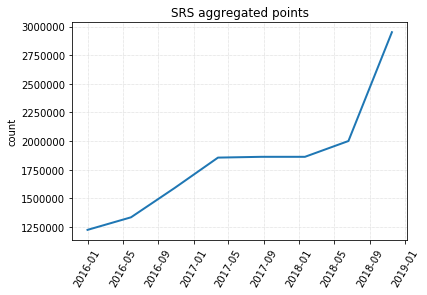

In [57]:
ax = thresholds.plot(x=0, 
                     y=1, 
                     kind='line', 
                     title="SRS aggregated points", 
                     legend=False, 
                     lw=2, 
                     rot=60)
ax.set_xlabel("")
ax.set_ylabel("count")
ax.grid(linewidth=0.5, linestyle='dotted')

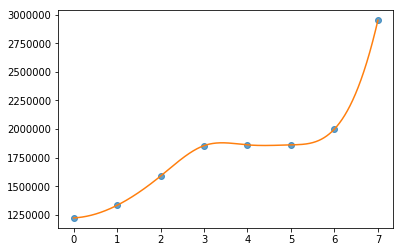

In [58]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

new_timesplot = [x[0] for x in enumerate(timeslots)]

xnew = np.linspace(0, new_timesplot[-1], 10000) 

ius = InterpolatedUnivariateSpline(new_timesplot, counts)
ynew = ius(xnew)
plt.plot(new_timesplot, counts, 'o', lw=3, alpha=0.7)
plt.plot(xnew, ynew)

plt.show()
